In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

# Linear SVC Assignment

In [2]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

### Import the admissions data set (admissions.csv).

In [3]:
data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv"
)
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


<IPython.core.display.Javascript object>

In [4]:
num_cols = ["GRE", "TOEFL", "SchoolRank", "SOP", "LOR", "GPA"]
bin_cols = ["Research"]

<IPython.core.display.Javascript object>

### Split the data into training and test sets, with the test set comprising 30% of the data.

In [5]:
X = data.drop(columns="Admitted")
y = data["Admitted"]

<IPython.core.display.Javascript object>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

### Generate an SVC model with a linear kernel. Set the regularization parameter (C) = 10. Check the score for both train and test sets. 

In [8]:
model = SVC(C=10, kernel="linear")
model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<IPython.core.display.Javascript object>

In [9]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score:.2f}")
print(f"Test score: {test_score:.2f}")

Train score: 0.88
Test score: 0.87


<IPython.core.display.Javascript object>

### Choose some other values for C and show the difference between the scores for the train and test sets.

In [10]:
model = SVC(C=0.001, kernel="linear")
model.fit(X_train, y_train)


train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score:.2f}")
print(f"Test score: {test_score:.2f}")

Train score: 0.68
Test score: 0.62


<IPython.core.display.Javascript object>

In [11]:
model = SVC(C=1000, kernel="linear")
model.fit(X_train, y_train)


train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score:.2f}")
print(f"Test score: {test_score:.2f}")

Train score: 0.88
Test score: 0.87


<IPython.core.display.Javascript object>

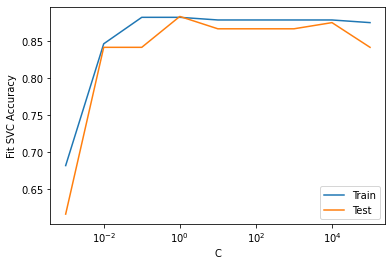

<IPython.core.display.Javascript object>

In [12]:
# Why not visualize?
# fmt: off
cs = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
# fmt: on

train_scores = []
test_scores = []
for c in cs:
    model = SVC(C=c, kernel="linear")
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)


plt.plot(cs, train_scores, label="Train")
plt.plot(cs, test_scores, label="Test")
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("Fit SVC Accuracy")
plt.legend()
plt.show()

### What if we switched up the target variable? Let assume that we know whether a student was admitted. Let's try to predict what their SchoolRank was. 

Create an SVC model with a linear kernel with the SchoolRank field as the target variable. Report both the train and the test scores.

In [13]:
num_cols = ["GRE", "TOEFL", "SOP", "LOR", "GPA"]
bin_cols = ["Research", "Admitted"]

<IPython.core.display.Javascript object>

In [14]:
X = data.drop(columns="SchoolRank")
y = data["SchoolRank"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

<IPython.core.display.Javascript object>

In [15]:
preprocessing = ColumnTransformer(
    [("scale", StandardScaler(), num_cols)], remainder="passthrough"
)

<IPython.core.display.Javascript object>

In [16]:
pipeline = Pipeline([("preprocessing", preprocessing), ("svm", SVC(kernel="linear"))])

<IPython.core.display.Javascript object>

In [17]:
grid = {"svm__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

pipeline_cv = GridSearchCV(pipeline, grid,)
pipeline_cv.fit(X_train, y_train)

pipeline_cv.best_params_

{'svm__C': 0.1}

<IPython.core.display.Javascript object>

In [18]:
train_score = pipeline_cv.score(X_train, y_train)
test_score = pipeline_cv.score(X_test, y_test)

print(f"Train score: {train_score:.2f}")
print(f"Test score: {test_score:.2f}")

Train score: 0.59
Test score: 0.61


<IPython.core.display.Javascript object>

### Show confusion matrices for the training and test sets, and a classification report for the test set. What trends do you notice?

In [19]:
# We're actually not performing too poorly.  Most of our mistakes are 1 off from the
# right answer (we never mistook a 5 for a 1 or a 1 for a 5).  Associating a cost
# with each type of mistake could help further clarify perfomance.

<IPython.core.display.Javascript object>

In [20]:
y_pred = pipeline_cv.predict(X_test)

<IPython.core.display.Javascript object>

In [21]:
# [f"Actually Rank {r}" for r in sorted(y.unique())]
# [f"Predicted Rank {r}" for r in sorted(y.unique())]

<IPython.core.display.Javascript object>

In [22]:
confusion_df = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    index=[
        "Actually Rank 1",
        "Actually Rank 2",
        "Actually Rank 3",
        "Actually Rank 4",
        "Actually Rank 5",
    ],
    columns=[
        "Predicted Rank 1",
        "Predicted Rank 2",
        "Predicted Rank 3",
        "Predicted Rank 4",
        "Predicted Rank 5",
    ],
)

confusion_df.style.background_gradient(axis=None)

,Predicted Rank 1,Predicted Rank 2,Predicted Rank 3,Predicted Rank 4,Predicted Rank 5
Actually Rank 1,2,2,0,0,0
Actually Rank 2,6,23,11,1,1
Actually Rank 3,0,7,30,2,1
Actually Rank 4,0,1,1,8,4
Actually Rank 5,0,0,4,6,10


<IPython.core.display.Javascript object>

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.25      0.50      0.33         4
           2       0.70      0.55      0.61        42
           3       0.65      0.75      0.70        40
           4       0.47      0.57      0.52        14
           5       0.62      0.50      0.56        20

    accuracy                           0.61       120
   macro avg       0.54      0.57      0.54       120
weighted avg       0.63      0.61      0.61       120



<IPython.core.display.Javascript object>